# Basic Exploratory Analysis

Notebook is work in progress

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import imread
import sys

# Taking the data

In [13]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
submission = pd.read_csv("data/sample_submission.csv")

In [146]:
train_data.head()
train_data.count()

id             1225029
url            1225029
landmark_id    1225029
dtype: int64

In [147]:
test_data.head()
test_data.count()

id     117703
url    117703
dtype: int64

In [26]:
#train_data.head()
#train_data[train_data['id'] == 'cacf8152e2d2ae60']['landmark_id']
#test_data[test_data['id'] == '000088da12d664db']
train_data[train_data['id'] == 'a5e4b1a992b489e5']['landmark_id'].values

array([1069])

## Create Labeled Data

In [35]:
import os
from tqdm import tqdm
train_y = []
train_X = []
roots = 'data/train/'
for dirs in tqdm(os.listdir(roots)):
    for file in os.listdir(roots + dirs):
        file_id = file[:-4]
        img_file = roots + dirs + '/' + file
        img = imread(img_file)
        train_X.append(img)
        #train_y.append(train_data[train_data['id'] == file_id]['landmark_id'].values[0])
        train_y.append(int(dirs))
        break
        
train_X = np.array(train_X)
train_y = np.array(train_y)
print(train_X.shape)
print(train_y.shape)
print(train_y)


  0%|          | 0/14951 [00:00<?, ?it/s]/Users/chienyi/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.

100%|██████████| 14951/14951 [02:07<00:00, 117.15it/s]


(14951, 128, 128, 3)
(14951,)
[1069 1855 9204 ... 3113 6461  986]


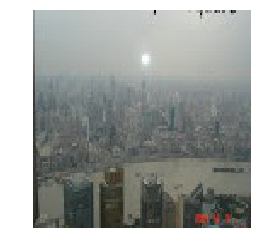

In [118]:
plt.imshow(train_X[9633].astype('uint8'))
plt.axis('off')
plt.show()

# Checking for any missing value

In [7]:
#missing data in training dataset
missing = train_data.isnull().sum()
all_val = train_data.count()

missing_train_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_train_df

,Missing,All
id,0,1225029
url,0,1225029
landmark_id,0,1225029


In [8]:
#missing data in test dataset
missing = test_data.isnull().sum()
all_val = test_data.count()

missing_test_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_test_df

,Missing,All
id,0,117703
url,0,117703


# Count of Landmark ids

number of classes in total =  14951
numebr of classes with <= 1 training examples =  159 or 1.06%
numebr of classes with <= 11 training examples =  6891 or 46.09%
numebr of classes with <= 21 training examples =  8952 or 59.88%
numebr of classes with <= 31 training examples =  10181 or 68.10%
numebr of classes with <= 41 training examples =  10971 or 73.38%
numebr of classes with <= 51 training examples =  11546 or 77.23%
numebr of classes with <= 61 training examples =  11955 or 79.96%
numebr of classes with <= 71 training examples =  12301 or 82.28%
numebr of classes with <= 81 training examples =  12552 or 83.95%
numebr of classes with <= 91 training examples =  12773 or 85.43%
numebr of classes with <= 101 training examples =  12948 or 86.60%
numebr of classes with <= 111 training examples =  13098 or 87.61%
numebr of classes with <= 121 training examples =  13229 or 88.48%
numebr of classes with <= 131 training examples =  13338 or 89.21%
numebr of classes with <= 141 training exa

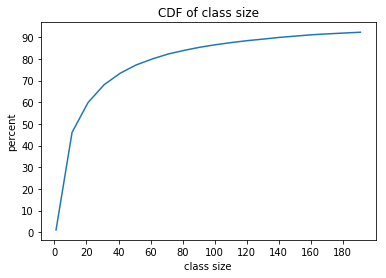

In [189]:
hist_df = pd.DataFrame(train_data.landmark_id.value_counts())
hist_df.reset_index(inplace=True)
hist_df.columns=['landmark_id', 'counts']
#hist = hist_df.hist('counts', bins=100)
print("number of classes in total = ", hist_df.shape[0])
# print("numebr of classes with only 1 training example = ", hist_df[hist_df.counts == 1].shape[0])
# print("numebr of classes with less than 10 training examples = ", hist_df[hist_df.counts < 10].shape[0])
# print("numebr of classes with less than 100 training examples = ", hist_df[hist_df.counts < 100].shape[0])
# print("numebr of classes with less than 1000 training examples = ", hist_df[hist_df.counts < 1000].shape[0])

#exp_counts = [1, 10, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000]
exp_counts = range(1, 200, 10)
#exp_counts = [1,2,3,4,5,6,7,8, 9, 10, 15, 20]
class_counts = []
class_per = []
for i in exp_counts:
    class_counts.append(hist_df[hist_df.counts <= i].shape[0])
    class_per.append(100*class_counts[-1]/14951)
    print("numebr of classes with <= {} training examples = ".format(i), class_counts[-1], "or {0:.2f}%".format(100*class_counts[-1]/14951))
#plt.plot(exp_counts, class_counts)
plt.title('CDF of class size')
plt.plot(exp_counts, class_per)
plt.yticks(np.arange(0, 100, 10))
plt.xticks(np.arange(0, 200, 20))
plt.xlabel('class size')
plt.ylabel('percent')
plt.savefig("./cdf_class.eps", format='eps', bbox_inches="tight")

In [213]:
hist_df[hist_df.counts >= 20].sum()

landmark_id    47490699
counts          1157977
dtype: int64

In [144]:
sample_train_X = []
sample_train_y = []
sample_val_X = []
sample_val_y = []
sample_test_X = []
sample_test_y = []
roots = 'data/train/'
num_sample_class = 0
for lid in tqdm(hist_df[hist_df.counts > 20].landmark_id):
    dirs = str(lid)
    # make sure this class has at least 20 examples
    if len(os.listdir(roots+dirs)) < 20:
        continue
    num_sample_class += 1
    i = 0
    for file in os.listdir(roots + dirs):
        file_id = file[:-4]
        img_file = roots + dirs + '/' + file
        #img = imread(img_file)
        if i < 16:
            #sample_train_X.append(img)
            #sample_train_y.append(int(dirs))
            sample_train_X.append(dirs+'/'+file)
            sample_train_y.append(int(dirs))
        elif i < 18:
            #sample_val_X.append(img)
            #sample_val_y.append(int(dirs))
            sample_val_X.append(dirs+'/'+file)
            sample_val_y.append(int(dirs))
        else:
            #sample_test_X.append(img)
            #sample_test_y.append(int(dirs))
            sample_test_X.append(dirs+'/'+file)
            sample_test_y.append(int(dirs))
        i += 1
        if i == 20:
            break

# sample_train_X = np.array(sample_train_X)
# sample_train_y = np.array(sample_train_y)
# sample_val_X = np.array(sample_val_X)
# sample_val_y = np.array(sample_val_y)
# sample_test_X = np.array(sample_test_X)
# sample_test_y = np.array(sample_test_y)
# print("shape of sample train X ", sample_train_X.shape)
# print("shape of sample val X ", sample_val_X.shape)
# print("shape of sample test X ", sample_test_X.shape)

with open("sample_train.txt", "w") as f:
    for img_name, label in zip(sample_train_X, sample_train_y):
        f.write(img_name+"\n")
with open("sample_val.txt", "w") as f:
    for img_name, label in zip(sample_val_X, sample_val_y):
        f.write(img_name+"\n")
with open("sample_test.txt", "w") as f:
    for img_name, label in zip(sample_test_X, sample_test_y):
        f.write(img_name+"\n")

100%|██████████| 6154/6154 [00:10<00:00, 563.36it/s]


In [145]:
print(num_sample_class)
print(len(sample_train_X))
print(len(sample_val_X))
print(len(sample_test_X))

6151
98416
12302
12302


In [149]:
pd.DataFrame(train_data.landmark_id.value_counts()).counts()

AttributeError: 'DataFrame' object has no attribute 'counts'

In [54]:
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(20))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','counts']
temp

,landmark_id,counts
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271
5,5554,11147
6,6651,9508
7,6696,9222
8,5376,9216
9,2743,8997


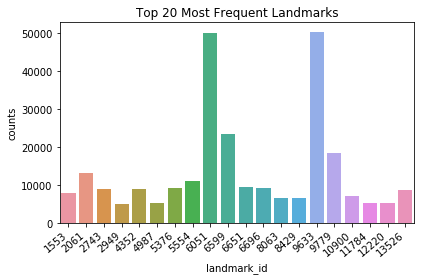

In [169]:
#sns.barplot(temp.index, temp.landmark_id)
plt.title('Top 20 Most Frequent Landmarks')
ax = sns.barplot(temp.landmark_id, temp.counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig("./counts_top20.png", bbox_inches="tight")

# Top 8 Landmark ids

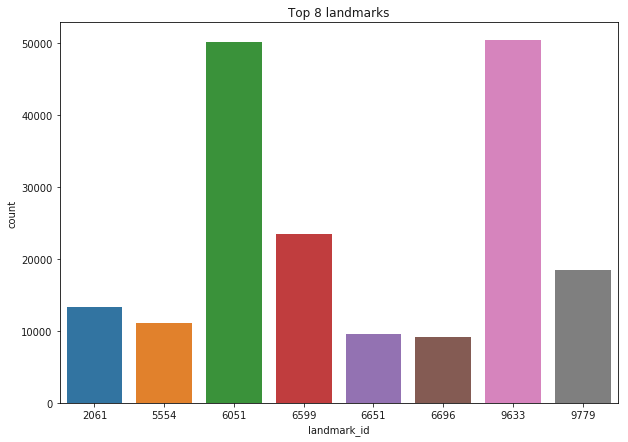

In [11]:
plt.figure(figsize=(10,7))
plt.title('Top 8 landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

# Least frequent Landmark

In [166]:
temp1 = pd.DataFrame(train_data.landmark_id.value_counts().tail(20))
temp1.reset_index(inplace=True)
temp1.columns = ['landmark_id','counts']
temp1

,landmark_id,counts
0,3196,1
1,6845,1
2,6408,1
3,14051,1
4,1033,1
5,2859,1
6,123,1
7,7977,1
8,8615,1
9,9718,1


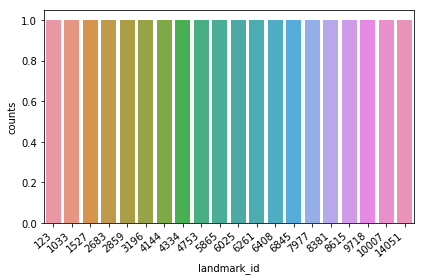

In [167]:
ax2 = sns.barplot(temp1.landmark_id, temp1.counts)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig("./counts_bottom20.png", bbox_inches="tight")

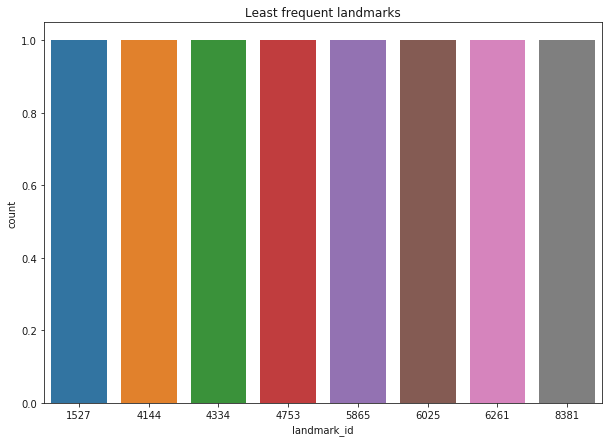

In [13]:
plt.figure(figsize = (10, 7))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp1,
            label="Count")
plt.show()

# Finding unique Landmarks, URLs

In [14]:
train_data.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

# Class distribution of URLs

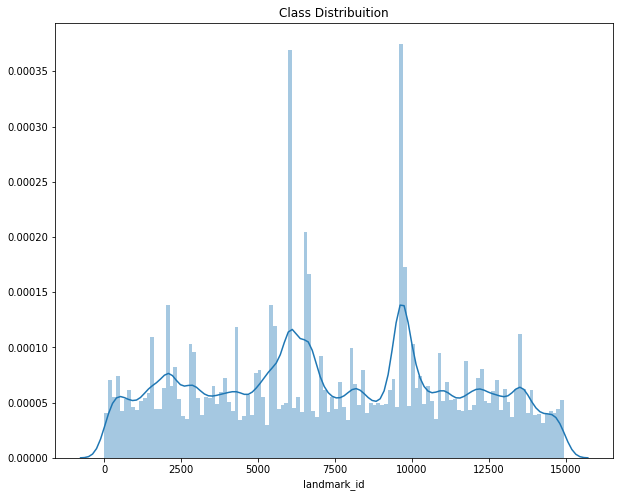

In [160]:
plt.figure(figsize = (10, 8))
plt.title('Class Distribuition')
sns.distplot(train_data['landmark_id'], kde=True,bins=120)
plt.savefig("./class_dist.png", bbox_inches="tight")
plt.show()

# 10 Images for the third highest most landmark i.e 6599

In [207]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(4).iteritems()])

    display(HTML(images_list))
    
category = train_data['landmark_id'].value_counts().keys()[0]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls[:4], "")
display_category(urls[4:], "")


# Getting site name from the URLs and adding site_name column in dataset

In [17]:
# Extract site_names for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site_name'] = temp_list

In [18]:
train_data.head(8)

,id,url,landmark_id,site_name
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676,static.panoramio.com
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651,lh6.ggpht.com
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284,lh6.ggpht.com
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429,lh3.googleusercontent.com
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231,lh5.googleusercontent.com
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400,lh5.googleusercontent.com
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779,lh6.ggpht.com
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288,lh4.googleusercontent.com


In [19]:
test_data.head()

,id,url,site_name
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...,lh3.googleusercontent.com
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...,lh3.googleusercontent.com
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...,lh3.googleusercontent.com
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...,lh3.googleusercontent.com
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...,lh3.googleusercontent.com


# Count of site

In [20]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(train_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,182010
1,lh4.googleusercontent.com,177774
2,lh5.googleusercontent.com,175251
3,lh6.googleusercontent.com,171506
4,lh3.ggpht.com,105043
5,lh4.ggpht.com,102460
6,lh6.ggpht.com,102066
7,lh5.ggpht.com,100905
8,mw2.google.com,94947
9,static.panoramio.com,12468


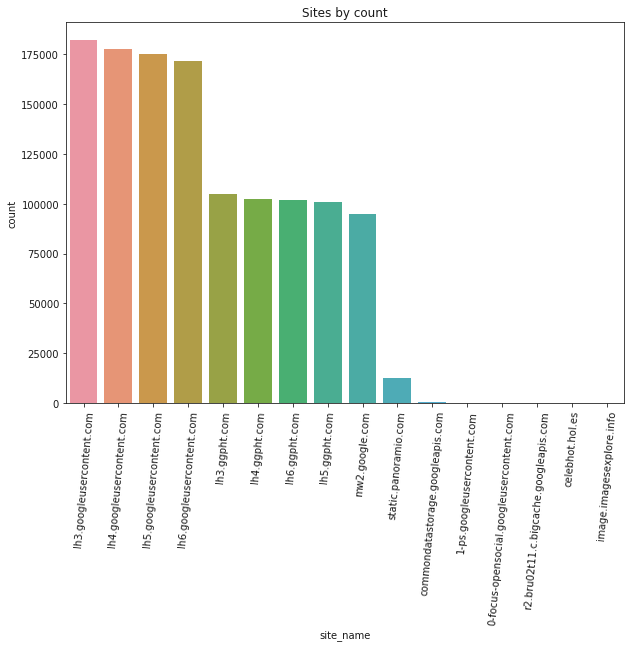

In [153]:
# Plot the Sites with their count
plt.figure(figsize = (10, 7))
plt.title('Sites by count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=85)
plt.show()